In [6]:
import pandas as pd


file_path = 'C:/Users/HP/Desktop/ds/bank-full.csv'
bank_df = pd.read_csv(file_path, sep=';')


print(bank_df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [2]:

print(bank_df.describe(include='all'))


print(bank_df.isnull().sum())


print(bank_df['y'].value_counts())


                 age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact        

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


for column in bank_df.select_dtypes(include=['object']).columns:
    if column != 'y':
        le = LabelEncoder()
        bank_df[column] = le.fit_transform(bank_df[column])


le_y = LabelEncoder()
bank_df['y'] = le_y.fit_transform(bank_df['y'])

X = bank_df.drop('y', axis=1)
y = bank_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(random_state=32)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[7406  603]
 [ 532  502]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      8009
           1       0.45      0.49      0.47      1034

    accuracy                           0.87      9043
   macro avg       0.69      0.71      0.70      9043
weighted avg       0.88      0.87      0.88      9043


Accuracy Score: 0.8744885546831803


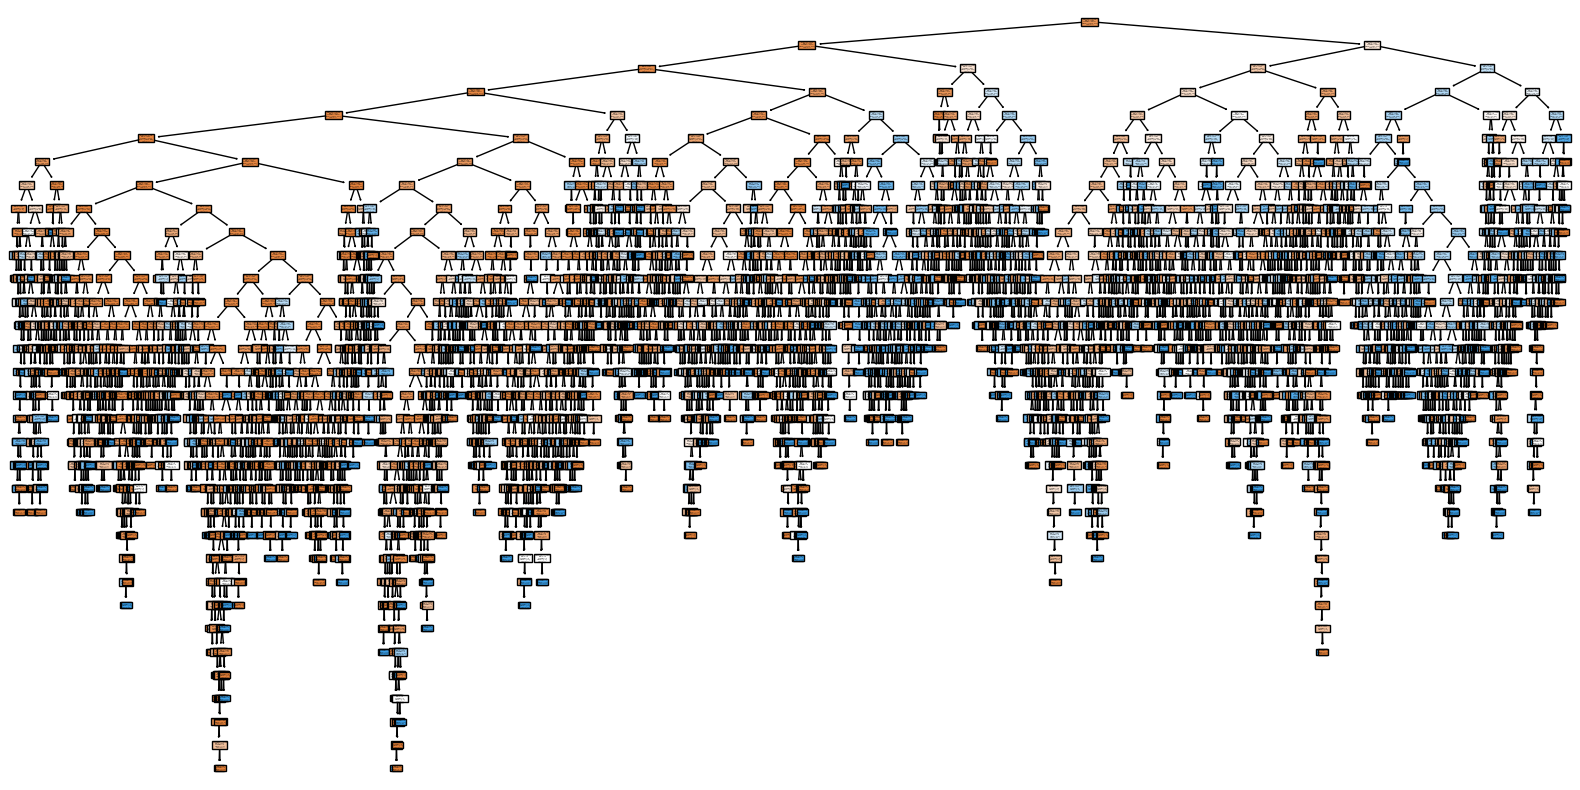

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


class_names = [str(cls) for cls in le_y.classes_]


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()
